# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [2]:
# Resolver acá
import requests

# Así se ve la búsqueda en el navegador:
# https://listado.mercadolibre.com.ar/libro-introduction-to-statistical-learning

# Al usar la API tenemos que seguir este formato:
# https://api.mercadolibre.com/sites/$SITE_ID/search?q=nombre%20item

# Notar que:
# $SITE_ID: MLA  # MLA es el sitio de Argentina
# item: item a buscar. (reemplazamos los espacios con %20)

buscar = "aromatizante saphirus"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

# Vemos el texto
response.text

<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"aromatizante saphirus","paging":{"total":1586,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLA1397805269","title":"Home Sprays Saphirus Aromatizador Textil Para Telas","condition":"new","thumbnail_id":"689002-MLA73134115054_122023","catalog_product_id":"MLA36709774","listing_type_id":"gold_special","sanitized_title":"home-sprays-saphirus-aromatizador-textil-para-telas","permalink":"https://articulo.mercadolibre.com.ar/MLA-1397805269-home-sprays-saphirus-aromatizador-textil-para-telas-_JM","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA30791","domain_id":"MLA-AIR_FRESHENERS","thumbnail":"http://http2.mlstatic.com/D_689002-MLA73134115054_122023-I.jpg","currency_id":"ARS","order_backend":1,"price":5925,"original_price":7500,"sale_price":{"price_id":"","amount":5925,"conditions":{"eligible":true,"context_restrictions":["channel_marketplace"],"start_time":"2024-08-31T03:00:00Z","end_time":"20

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [13]:
# Resolver acá
!pip install pandas
import pandas as pd

import requests
import pandas as pd

# Parámetros de búsqueda
buscar = "aromatizante saphirus"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Realizamos el request a la API de Mercado Libre
response = requests.get(url)

# Convertimos la respuesta a formato JSON (diccionario de Python)
data = response.json()

# Extraemos los precios de los ítems
precios = [item['price'] for item in data['results']]

# Convertimos la lista de precios a un DataFrame
df = pd.DataFrame(precios, columns=['Precio'])

# Calculamos el precio promedio, mínimo y máximo
precio_promedio = df['Precio'].mean()
precio_minimo = df['Precio'].min()
precio_maximo = df['Precio'].max()

# Mostramos los resultados
print(f"Precio promedio: {precio_promedio}")
print(f"Precio mínimo: {precio_minimo}")
print(f"Precio máximo: {precio_maximo}")

df

Precio promedio: 15384.826000000001
Precio mínimo: 1615.0
Precio máximo: 63680.0


,Precio
0,5925.00
1,12300.00
2,4233.00
3,4815.00
4,28140.00
5,31950.00
6,9990.00
7,9922.75
8,45500.00
9,1615.00


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

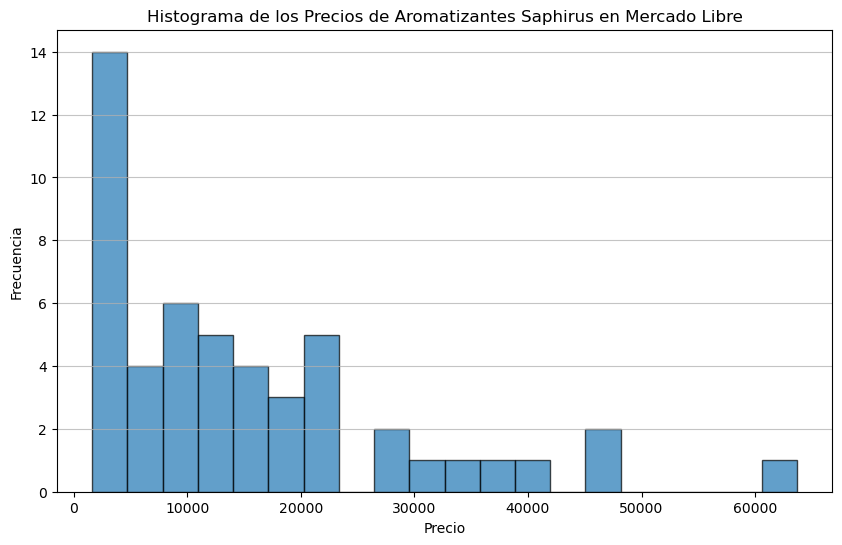

In [15]:
# Resolver acá
!pip install requests pandas matplotlib

import matplotlib.pyplot as plt

# Crear un histograma de los precios
plt.figure(figsize=(10, 6))
plt.hist(df['Precio'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histograma de los Precios de Aromatizantes Saphirus en Mercado Libre')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

#encontramos outliers
# es la barras del histograma que está significativamente separada del resto de las barras 
#esos valores podrían considerarse outliers. Lo buscamos en mercado libre al aromatizante con 
#ese precio elevado y corresponde a un kit. 

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [17]:
import requests

# Obtener todas las categorías de Mercado Libre Argentina (MLA)
url_categorias = "https://api.mercadolibre.com/sites/MLA/categories"
response_categorias = requests.get(url_categorias)
categorias = response_categorias.json()

# Mostrar las categorías disponibles (mostrar solo algunas para simplificar)
for categoria in categorias[:5]:  # Mostrar solo las primeras 5 categorías
    print(f"ID: {categoria['id']}, Nombre: {categoria['name']}")

ID: MLA5725, Nombre: Accesorios para Vehículos
ID: MLA1512, Nombre: Agro
ID: MLA1403, Nombre: Alimentos y Bebidas
ID: MLA1071, Nombre: Animales y Mascotas
ID: MLA1367, Nombre: Antigüedades y Colecciones


In [19]:
import pandas as pd

# ID de la categoría seleccionada (por ejemplo, Computación)
categoria_id = "MLA1648"
url_productos_categoria = f"https://api.mercadolibre.com/sites/MLA/search?category={categoria_id}"

# Realizamos la solicitud a la API para obtener los productos de la categoría
response_productos = requests.get(url_productos_categoria)
productos_data = response_productos.json()

# Extraemos información relevante de los productos
productos = productos_data['results']
df_productos = pd.DataFrame(productos)

# Seleccionamos columnas relevantes (título, precio, precio original, acepta Mercado Pago)
df_relevant = df_productos[['title', 'price']]

# Calculamos el precio promedio de los productos de la categoría
precio_promedio = df_relevant['price'].mean()

print(f"Precio promedio de los productos de la categoría: {precio_promedio:.2f}")

Precio promedio de los productos de la categoría: 211231.96


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [21]:
# Resolver acá
import requests #html requestor
from bs4 import BeautifulSoup #html parser
import pandas as pd #dataframe manipulator

!pip install pandas



In [28]:
!pip install requests beautifulsoup4 pandas openpyxl

import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL del sitio web de noticias
url = "https://www.lanacion.com.ar/"

# Realizamos la solicitud para obtener el contenido HTML
r = requests.get(url)
contenido = r.content

# Usamos BeautifulSoup para parsear el contenido
soup = BeautifulSoup(contenido, "html.parser")

# Encontramos todos los elementos <h2> que pueden contener enlaces a noticias
h2_elements = soup.find_all('h2')

# Lista para almacenar los enlaces
enlaces = []

# Extraemos los enlaces dentro de los elementos <h2>
for h2_element in h2_elements:
    a_tag = h2_element.find('a')  # Buscamos el primer elemento <a> dentro del <h2>
    if a_tag and 'href' in a_tag.attrs:  # Si hay un enlace <a> con atributo href
        enlace = a_tag['href']
        if enlace.startswith('/'):  # Si el enlace es relativo, completamos la URL
            enlace = 'https://www.lanacion.com.ar' + enlace
        enlaces.append({'link': enlace})

# Crear un DataFrame a partir de la lista de enlaces
df_enlaces = pd.DataFrame(enlaces)

print(df_enlaces)

# Guardar el DataFrame en un archivo Excel
#df_enlaces.to_excel('enlaces_noticias.xlsx', index=False)

#print("Los enlaces de las noticias de la portada se han guardado en 'enlaces_noticias.xlsx'.")

Empty DataFrame
Columns: []
Index: []


In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL del sitio web de noticias
url = "https://www.lanacion.com.ar/"

# Realizamos la solicitud para obtener el contenido HTML
r = requests.get(url)
contenido = r.content

# Usamos BeautifulSoup para parsear el contenido
soup = BeautifulSoup(contenido, "html.parser")

# Encontramos todos los elementos <h2> que pueden contener enlaces a noticias
h2_elements = soup.find_all('h2')

# Lista para almacenar los enlaces
enlaces = []

# Extraemos los enlaces dentro de los elementos <h2>
for h2_element in h2_elements:
    a_tag = h2_element.find('a')  # Buscamos el primer elemento <a> dentro del <h2>
    if a_tag and 'href' in a_tag.attrs:  # Si hay un enlace <a> con atributo href
        enlace = a_tag['href']
        if enlace.startswith('/'):  # Si el enlace es relativo, completamos la URL
            enlace = 'https://www.lanacion.com.ar' + enlace
        enlaces.append({'link': enlace})

# Crear un DataFrame a partir de la lista de enlaces
df_enlaces = pd.DataFrame(enlaces)

print(df_enlaces)

# Guardar el DataFrame en un archivo Excel
#df_enlaces.to_excel('enlaces_noticias.xlsx', index=False)

#print("Los enlaces de las noticias de la portada se han guardado en 'enlaces_noticias.xlsx'.")

Empty DataFrame
Columns: []
Index: []
